# Implementing Logistic Regression

In [6]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part A: Implementing Logistic Regression

LogisticRegression.loss(X, y) should compute the empirical risk 
 using the logistic loss function
 
 
The weight vector 
 used for this calculation should be stored as an instance variable of the class.
LogisticRegression.grad(X, y) should compute the gradient of the empirical risk 
. You can use the formula for the gradient supplied in the lecture notes on gradient descent.

## Experiments

Generate data for a classification problem.

In [7]:
import torch

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

Plot the data

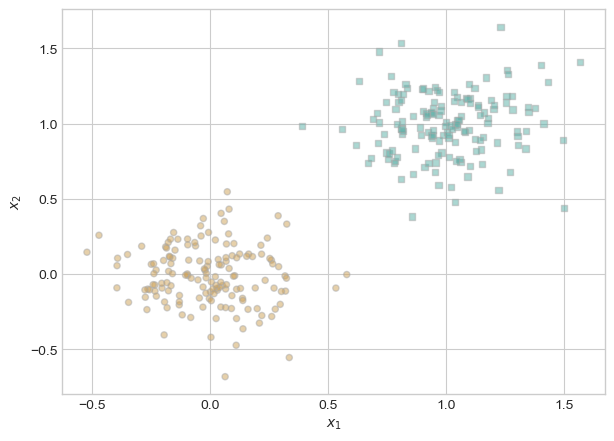

In [8]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def plot_classification_data(X, y, ax):
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    
    
fig, ax = plt.subplots(1, 1)

# p_dims is 2
X, y = classification_data(noise = 0.2)
# print(f"{X=}")
# print(f"{y=}")
plot_classification_data(X, y, ax)

Code tp graph a straight line

In [12]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

### Vanilla Gradient Descent

Vanilla gradient descent: When p_dim = 2, when alpha is sufficiently small and beta=0.

Want to see:

1. Gradient descent for logistic regression converges to a weight vector w that looks visually correct
    * show this by plot the decision boundary with the data
2. Loss decreases monotonically: A monotonic function is a function which is either entirely nonincreasing or nondecreasing.
    * show this by plotting the loss over iterations

IndexError: index 6 is out of bounds for axis 0 with size 6

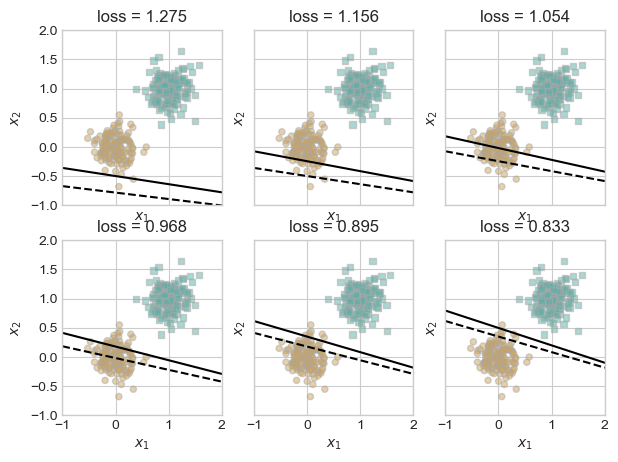

In [30]:
# initialize a Logistic Regression 
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)
loss = LR.loss(X,y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss_vec = []

for index in range(0,1000):
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(LR.w)

    # for vanilla gradient descent, alpha must be sufficiently small and beta must be 0
    local_loss = opt.step(X, y, alpha = 0.3, beta = 0)
    
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if (local_loss > 0):
                
        if(current_ax < 6):
            # Plot and record loss 
            plot_classification_data(X, y, ax)
            draw_line(old_w, x_min=-1, x_max=2, ax=ax, color="black", linestyle="dashed")
            
            loss = LR.loss(X, y).item()
            # print(f"{loss=}")
            
            loss_vec.append(loss)
            draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="black")
            ax.set_title(f"loss = {loss:.3f}")
            ax.set(xlim=(-1, 2), ylim=(-1, 2))
            current_ax += 1
        else:
            
            loss = LR.loss(X, y).item()
            # print(f"{loss=}")
            
            loss_vec.append(loss)
            
plt.tight_layout()

Plot the loss over time, only showing when the loss is updated

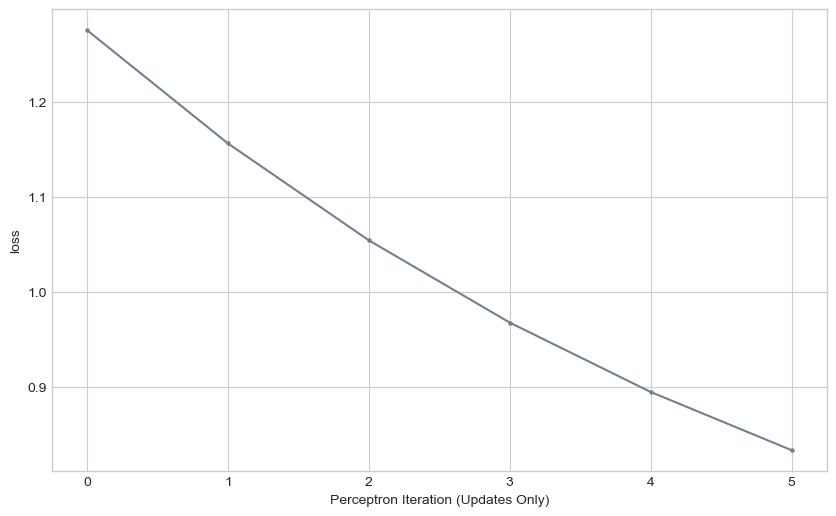

In [31]:
def plot_loss(loss):
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))


    plt.plot(loss, color = "slategrey")
    plt.scatter(torch.arange(len(loss)), loss, color = "slategrey", s=5)
    plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

plot_loss(loss_vec)

Through both of these visualizations we can see that the loss is decreasing monotonically over time.

Plot the final line separating the data

[(-1.0, 2.0), (-1.0, 2.0)]

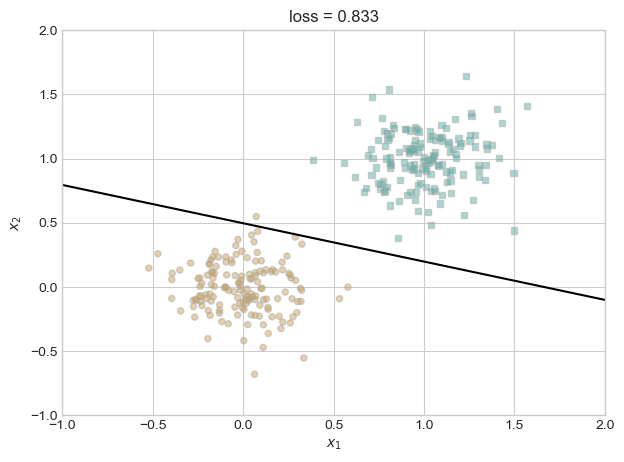

In [32]:
fig, ax = plt.subplots(1, 1)

plot_classification_data(X, y, ax)

draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="black")
ax.set_title(f"loss = {loss:.3f}")
ax.set(xlim=(-1, 2), ylim=(-1, 2))

We can see that the dividing line almost perfectly divides the classes. In time, we could see the logistic regression training to become perfectly accurate.

## Benefits of momentum

On the same data, gradient descent with momentum (e.g. beta=0.9) can converge to the correct weight vector in fewer iterations than vanilla gradient descent (with beta=0). Plot the loss over iterations for each method. You may need to experiment with the data and choice of alpha in order to observe speedups due to momentum.

IndexError: index 6 is out of bounds for axis 0 with size 6

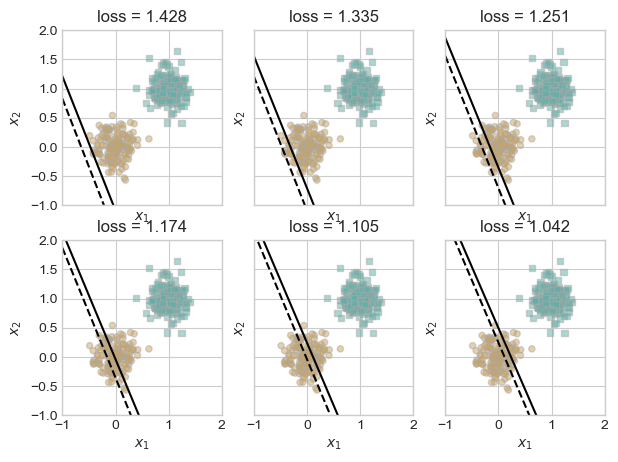

In [44]:
# initialize a Logistic Regression 
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)
X, y = classification_data(noise = 0.2)
LR.loss(X,y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss_vec = []

for index in range(0,1000):
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(LR.w)

    # to see the benefits of momentum, alpha must be sufficiently small and beta must be 0.9
    local_loss = opt.step(X, y, alpha = 0.2, beta = 0.9)
    
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if (local_loss > 0):
                
        if(current_ax < 6):
            # Plot and record loss 
            plot_classification_data(X, y, ax)
            draw_line(old_w, x_min=-1, x_max=2, ax=ax, color="black", linestyle="dashed")
            
            loss = LR.loss(X, y).item()
            # print(f"{loss=}")
            
            loss_vec.append(loss)
            draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="black")
            ax.set_title(f"loss = {loss:.3f}")
            ax.set(xlim=(-1, 2), ylim=(-1, 2))
            current_ax += 1
        else:
            
            loss = LR.loss(X, y).item()
            # print(f"{loss=}")
            
            loss_vec.append(loss)
plt.tight_layout()

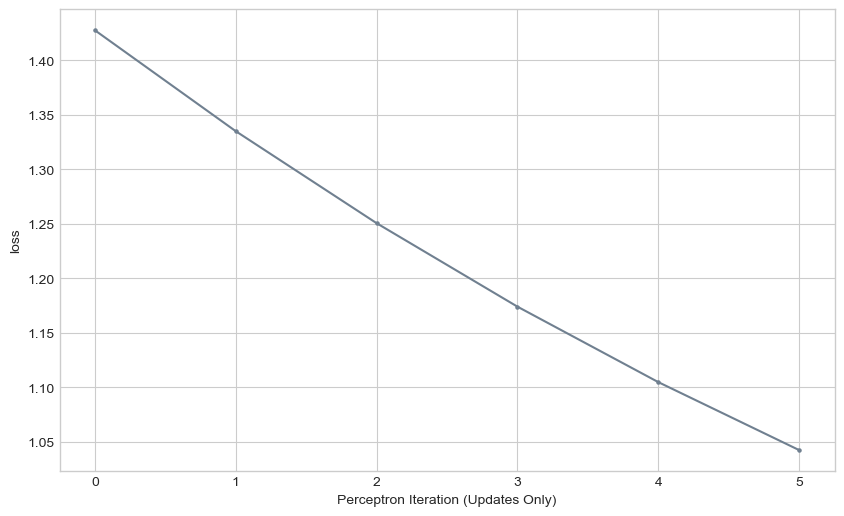

In [45]:
plot_loss(loss_vec)

[(-1.0, 2.0), (-1.0, 2.0)]

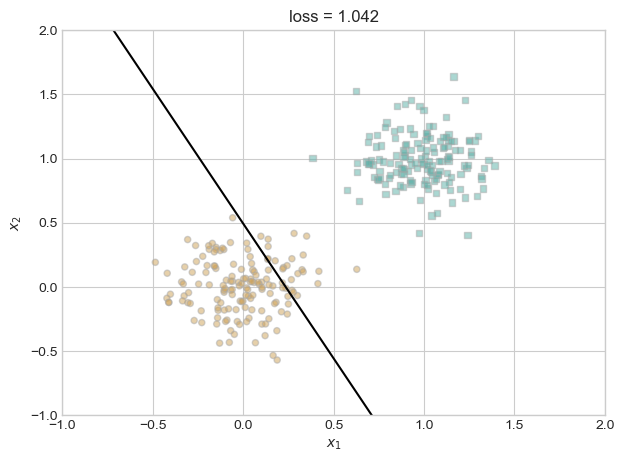

In [46]:
fig, ax = plt.subplots(1, 1)

plot_classification_data(X, y, ax)

draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="black")
ax.set_title(f"loss = {loss:.3f}")
ax.set(xlim=(-1, 2), ylim=(-1, 2))

We can see the benefits of increase of momentum by viewing the improved dividing line. The increase in the beta value allows our logistic regression to improve at a much faster rate then when beta=0. 

## Overfitting

Generate some data where p_dim > n_points. For example, p_dim = 100 and n_points = 50. Do this twice with the exact same parameters. Call the first dataset X_train, y_train and the second dataset X_test, y_test. Then, do an experiment in which you fit a logistic regression model to the data X_train, y_train and obtain 100% accuracy on this training data. What is the accuracy on the test data?

For overfitting, we need to generate data where p_dim > n_points.

In [55]:
X_train, y_train = classification_data(n_points = 50, noise = 0.2, p_dims = 100)

Want to achieve 100% accuracy with the training data.

In [65]:
# initialize a Logistic Regression 
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

# initialize for main loop
loss_vec = []

for index in range(0, 1000):

    loss = LR.loss(X_train, y_train).item()
    loss_vec.append(loss)

    # to see the benefits of momentum, alpha must be sufficiently small and beta must be 0.9
    opt.step(X_train, y_train, alpha = 0.1, beta = 0.9)
            
plt.tight_layout()

<Figure size 700x500 with 0 Axes>

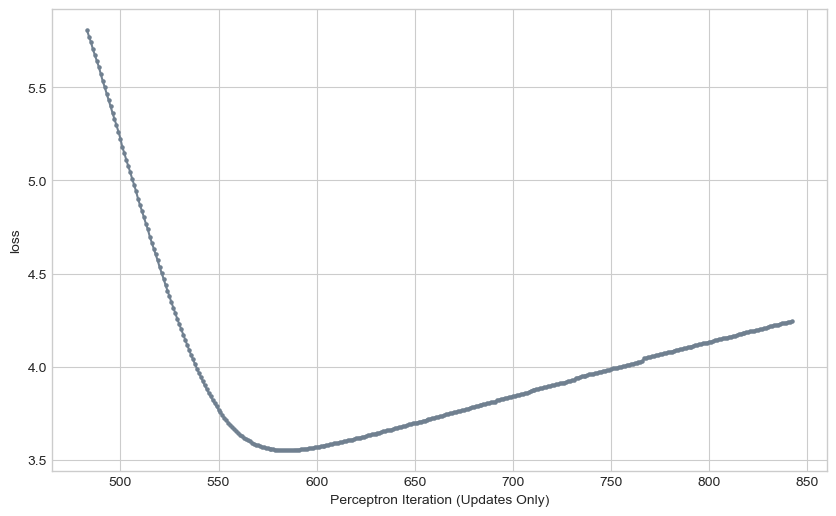

In [66]:
plot_loss(loss_vec)

Check the accuracy of the Logistic Regression function on the training data.

[(-1.0, 2.0), (-1.0, 2.0)]

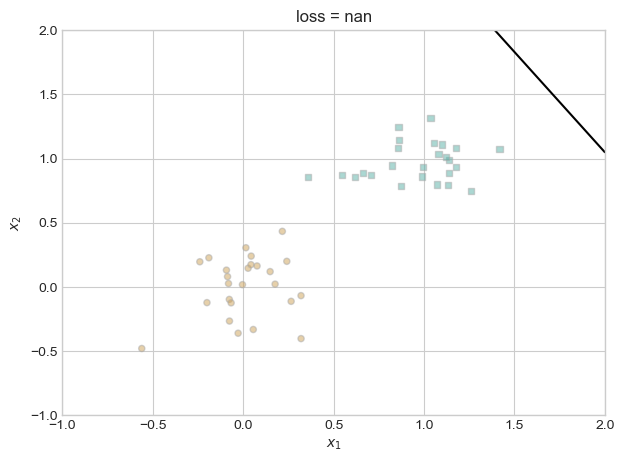

In [70]:
fig, ax = plt.subplots(1, 1)

plot_classification_data(X_train, y_train, ax)

draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="black")
ax.set_title(f"loss = {loss}")
ax.set(xlim=(-1, 2), ylim=(-1, 2))

Initialize the test data with the same parameters as the training data.

In [68]:
X_test, y_test = classification_data(n_points = 50, noise = 0.2, p_dims = 100)

[(-1.0, 2.0), (-1.0, 2.0)]

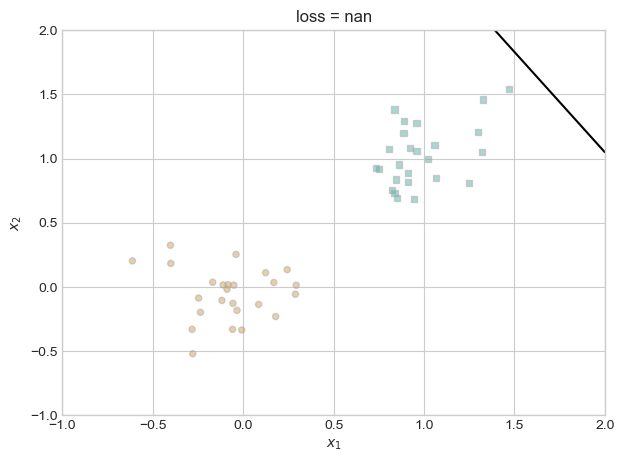

In [71]:
fig, ax = plt.subplots(1, 1)

plot_classification_data(X_test, y_test, ax)

draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="black")
# CHANGE TITLE
ax.set_title(f"loss = {loss}")
ax.set(xlim=(-1, 2), ylim=(-1, 2))